# Lab 10: Hyperparameter Tuning and Evaluation in Decision Trees

Welcome to Lab 10, dedicated to mastering the practical aspects of hyperparameter tuning and model evaluation in decision trees.

- **Hyperparameter Tuning Practice (one hyperparameter)**: Begin by tuning a single hyperparameter of the decision tree to understand its impact on model performance.
- **Hyperparameter Tuning Practice (several hyperparameters)**: Apply Grid Search to optimize multiple decision tree parameters, enhancing overall model performance.
- **Model Evaluation Techniques**: Learn and apply various metrics to evaluate the decision tree models, focusing on real-world application and effectiveness.
- **Feature Selection Exercise**: Engage in feature selection to streamline the model, ensuring efficiency without compromising accuracy.

This lab is designed to provide hands-on experience with key techniques in refining and assessing decision trees, vital for effective data modeling.


## Library Imports
This cell imports various libraries necessary for data handling, model building, and data visualization.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


## Loading Breast Cancer Data
The `breast_cancer` dataset in scikit-learn includes features from digitized images of breast mass fine needle aspirates. It features 569 instances, each with 30 numeric predictive attributes, and a binary target variable indicating cancer (malignant or benign). Key attributes include measurements like radius, texture, and smoothness of cell nuclei. This dataset is widely used in machine learning for classification tasks, particularly for distinguishing between malignant and benign tumors.

For more information, refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).


In [2]:
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

## Data Splitting
This cell splits the dataset into training, validation, and testing sets to evaluate the model's performance.

In [3]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

## Decision Tree Hyperparameter Evaluation

This cell defines the `evaluate_decision_tree` function to test different hyperparameter values for a Decision Tree Classifier. It trains the model on training data, measures accuracy on training and validation sets, and returns these accuracies. This helps identify the best hyperparameter setting for optimal model performance.




In [4]:
def evaluate_decision_tree(hyperparameter_range, hyperparameter_name):
    train_accuracies = []
    val_accuracies = []

    for value in hyperparameter_range:
        clf_params = {hyperparameter_name: value, 'random_state': 42}
        clf = DecisionTreeClassifier(**clf_params)
        clf.fit(X_train, y_train)
        train_pred = clf.predict(X_train)
        val_pred = clf.predict(X_val)
        train_accuracy = accuracy_score(y_train, train_pred)
        val_accuracy = accuracy_score(y_val, val_pred)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return train_accuracies, val_accuracies

## Plotting Decision Tree Hyperparameter Results

The `plot_hyperparameter_results` function visualizes the performance of the decision tree model. It plots training and validation accuracies against various hyperparameter values. The function handles both continuous and discrete hyperparameters, displaying the results either as line graphs (for continuous) or bar charts (for discrete). This visualization aids in identifying the optimal hyperparameter value for the decision tree model.



In [5]:
def plot_hyperparameter_results(hyperparameter_range, train_accuracies, val_accuracies, hyperparameter_name):
    plt.figure(figsize=(12, 6))

    # Check if the hyperparameter values are continuous or discrete
    if isinstance(hyperparameter_range[0], (int, float)):
        # Continuous hyperparameter
        plt.plot(hyperparameter_range, train_accuracies, label='Train Accuracy', marker='o', linestyle='-', markersize=5)
        plt.plot(hyperparameter_range, val_accuracies, label='Validation Accuracy', marker='o', linestyle='-', markersize=5)
        plt.xticks(hyperparameter_range)  # Set x-axis ticks
        # Adding vertical lines for each tick
        for x in hyperparameter_range:
            plt.axvline(x, color='gray', linestyle='--', linewidth=0.5)
    else:
        # Discrete hyperparameter
        # Setting the width of the bars
        bar_width = 0.35

        # Calculating the positions of the bars
        index = np.arange(len(hyperparameter_range))

        # Creating bar plots
        plt.bar(index, train_accuracies, bar_width, label='Train Accuracy', alpha=0.6)
        plt.bar(index + bar_width, val_accuracies, bar_width, label='Validation Accuracy', alpha=0.6)
        plt.xticks(index + bar_width / 2, hyperparameter_range)  # Set x-axis ticks

    plt.xlabel(hyperparameter_name.capitalize())
    plt.ylabel('Accuracy')
    plt.title(f'Decision Tree Model Selection: {hyperparameter_name.capitalize()} vs Accuracy')
    plt.legend()
    plt.show()


## Configuring Hyperparameters for Decision Tree

### Hyperparameter Selection
- The cell defines `hyperparameter_name` to specify which hyperparameter of the decision tree to evaluate.

### Range Specification
- `hyperparameter_range` determines the values over which the specified hyperparameter will be tested.



In [6]:
hyperparameter_name = 'min_samples_leaf' #'max_depth'  # Replace with the desired hyperparameter
hyperparameter_range = range(1, 20)  # Adjust the range as needed

## Running Hyperparameter Evaluation

This line executes the `evaluate_decision_tree` function with the specified `hyperparameter_range` and `hyperparameter_name`, capturing training and validation accuracies.

## Visualizing Evaluation Results

After evaluating the decision tree, this line calls `plot_hyperparameter_results` to visually present the training and validation accuracies across the `hyperparameter_range`. It helps in comparing the performance impact of different hyperparameter values.



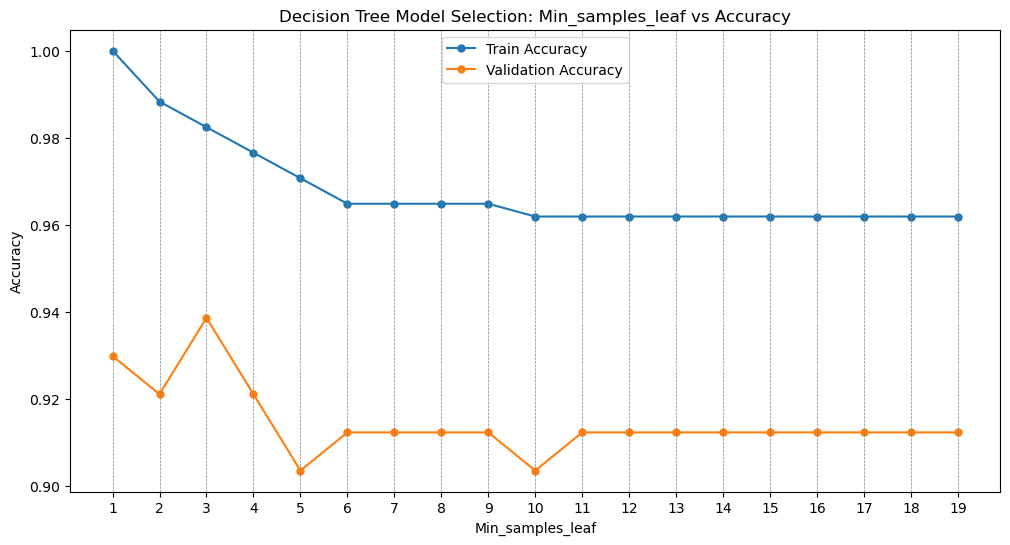

In [7]:
train_accuracies, val_accuracies = evaluate_decision_tree(hyperparameter_range, hyperparameter_name)
plot_hyperparameter_results(hyperparameter_range, train_accuracies, val_accuracies, hyperparameter_name)

## Building and Evaluating the Final Model

Sets `optimal_value` for the chosen hyperparameter, constructs the final decision tree model using this value, and fits it on the combined training and validation data. The model's accuracy is then evaluated on the test set, and the test accuracy is printed out, showcasing the effectiveness of the optimally tuned model.


In [8]:
optimal_value = 3
final_model = DecisionTreeClassifier(**{hyperparameter_name: optimal_value, 'random_state': 42})
final_model.fit(X_train_val, y_train_val)
final_test_accuracy = accuracy_score(y_test, final_model.predict(X_test))
print("Test Accuracy of Optimal Model:", final_test_accuracy)

Test Accuracy of Optimal Model: 0.9473684210526315


# Introduction to Hyperparameter Tuning and Grid Search

## Hyperparameter Tuning in Machine Learning
- Key process to enhance model performance.
- Involves fine-tuning model settings (hyperparameters).

## Grid Search Methodology
- Systematic exploration of multiple hyperparameter combinations.
- Identifies optimal values through exhaustive search.

## Significance in Model Optimization
- Crucial for improving accuracy and efficiency.
- A fundamental technique for effective model building.

This section lays the foundation for understanding and implementing hyperparameter tuning, particularly through grid search, a core component of machine learning model development.



In [9]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

## Setting Up Grid Search for Decision Tree

Initializes a `DecisionTreeClassifier` and configures `GridSearchCV` with:
- The decision tree classifier (`clf`) as the estimator.
- A parameter grid (`param_grid`) to explore.
- 5-fold cross-validation (`cv=5`).
- Accuracy as the scoring metric.



In [10]:
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

## Executing Grid Search

Runs `grid_search.fit` on the training data (`X_train`, `y_train`) to find the optimal hyperparameter settings based on the defined grid.


In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

## Retrieving Best Model Parameters from Grid Search

- Extracts `best_params` from `grid_search`, revealing the optimal hyperparameter settings.
- Assigns `best_model` as the best estimator found by grid search.
- Prints `best_params` to display the selected hyperparameters for the best model.


In [12]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'max_depth': None, 'min_samples_split': 5}


## Visualizing Grid Search Outcomes with Heatmap

This function, `plot_grid_search_results`, generates a heatmap to visualize the performance of various hyperparameter combinations from Grid Search:
- Takes a `GridSearchCV` object and selected performance metric (default `mean_test_score`).
- Specifies hyperparameters for x and y axes (e.g., `param_max_depth`, `param_min_samples_split`).
- The heatmap highlights how different hyperparameter pairs affect the chosen metric, aiding in understanding the best parameter combinations.


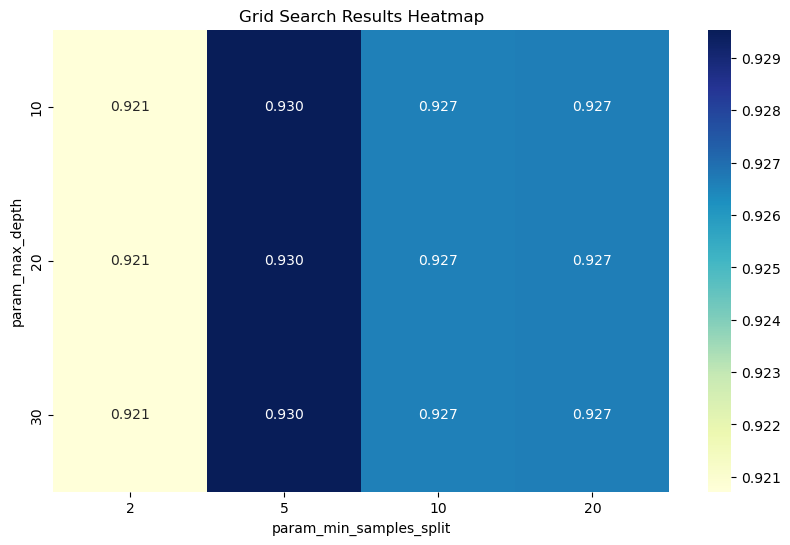

In [13]:
def plot_grid_search_results(grid_search, metric='mean_test_score', param_x=None, param_y=None):
    """
    Plot the results of a Grid Search as a heatmap.

    Parameters:
    - grid_search: GridSearchCV object
    - metric: The performance metric to use for plotting (default is 'mean_test_score')
    - param_x: The name of the hyperparameter for the x-axis (e.g., 'param_max_depth')
    - param_y: The name of the hyperparameter for the y-axis (e.g., 'param_min_samples_split')
    """
    results = grid_search.cv_results_
    pivot_table = pd.pivot_table(pd.DataFrame(results), values=metric, index=param_x, columns=param_y)

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".3f", cbar=True, square=True)
    plt.xlabel(param_y)
    plt.ylabel(param_x)
    plt.title('Grid Search Results Heatmap')
    plt.show()

plot_grid_search_results(grid_search, metric='mean_test_score', param_x='param_max_depth', param_y='param_min_samples_split')

## Evaluating Best Model on Test Data

Evaluates the performance of the best model (identified by Grid Search) on the test dataset:
- `best_model.score` computes the accuracy on `X_test` and `y_test`.
- Prints the optimal hyperparameters (`best_params`).
- Displays the test accuracy, indicating how well the model generalizes to unseen data.



In [20]:
test_accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}
Test Accuracy: 0.956140350877193


# Deep Evaluation of the Best Model

This section is dedicated to a thorough evaluation of the best-performing model identified by Grid Search. We utilize a combination of a detailed classification report and a confusion matrix:
- The classification report provides insights into precision, recall, and F1-score for each class.
- The confusion matrix, visualized as a heatmap, offers a clear view of the model's performance in terms of correctly and incorrectly classified instances.

This comprehensive analysis helps us understand the strengths and weaknesses of our model on the test data.


In [21]:
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



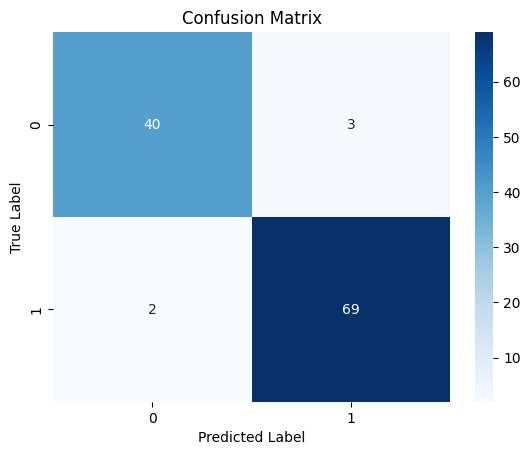

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Exercise: Feature Selection and Hyperparameter Tuning on Cancer Dataset

**Objective**: Implement feature selection on the breast cancer dataset to identify the top five attributes, aiming to maintain performance while reducing features.

**Steps**:
1. Load the breast cancer dataset.
2. Apply feature selection to identify five key attributes.
3. Conduct hyperparameter tuning to optimize the model.
4. Train a decision tree model using these attributes.
5. Evaluate the model's performance, ensuring it's comparable to using all features.
6. Visualize and analyze the final decision tree.

This exercise is designed to understand the balance between feature reduction and model effectiveness.



In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 2: Apply feature selection to identify five key attributes
# Using SelectKBest with ANOVA F-statistic as the scoring function
k_best = 5
selector = SelectKBest(score_func=f_classif, k=k_best)
X_selected = selector.fit_transform(X, y)

# Step 3: Conduct hyperparameter tuning to optimize the model
# We use GridSearchCV to find the best hyperparameters for the Decision Tree model
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_selected, y)

# Best hyperparameters
best_params = grid_search.best_params_

# Step 4: Train a decision tree model using these attributes
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_selected, y)
# Step 5: Evaluate the model's performance, ensuring it's comparable to using all features
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best-selected features for testing set
X_test_selected = selector.transform(X_test)

# Predictions using selected features
y_pred_selected_features = best_dt_classifier.predict(X_test_selected)

# Predictions using all features
y_pred_all_features = best_dt_classifier.predict(X_test)

# Step 6: Visualize and analyze the final decision tree
tree_rules = export_text(best_dt_classifier, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Evaluate performance
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f"\nAccuracy using all features: {accuracy_all_features:.4f}")

# Evaluate performance using selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print(f"Accuracy using selected features: {accuracy_selected_features:.4f}")


c:\Users\AMIRA\.conda\envs\DM_ENV\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 30 features, but DecisionTreeClassifier is expecting 5 features as input.